In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nigerian-traffic-crashes-2020-2024/Nigerian_Road_Traffic_Crashes_2020_2024.csv


# Data Collection
Here we are reading the data from a csv file and making it into a pandas Dataframe.

In [2]:
crash_df = pd.read_csv('/kaggle/input/nigerian-traffic-crashes-2020-2024/Nigerian_Road_Traffic_Crashes_2020_2024.csv')
crash_df

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8
3,Q4 2020,Anambra,72,152,20,83,43,1,0,0,39
4,Q4 2020,Bauchi,154,685,90,140,74,0,0,0,66
...,...,...,...,...,...,...,...,...,...,...,...
513,Q1 2024,Rivers,15,32,4,21,17,0,0,0,4
514,Q1 2024,Sokoto,24,122,41,52,41,0,0,0,11
515,Q1 2024,Taraba,38,98,17,38,17,0,0,0,21
516,Q1 2024,Yobe,39,234,13,55,38,0,0,0,17


In [3]:
crash_df.describe() 

,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,83.517375,245.631274,40.600386,100.667954,37.903475,0.140927,0.355212,23.824324,38.444015
std,77.023061,201.131483,36.858302,108.567113,57.093042,0.454320,1.677385,51.024267,61.983992
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-348.000000
25%,30.000000,96.250000,15.000000,32.000000,0.000000,0.000000,0.000000,0.000000,12.000000
50%,58.000000,185.500000,30.000000,64.000000,15.000000,0.000000,0.000000,0.000000,27.000000
75%,107.750000,331.500000,55.750000,134.750000,55.000000,0.000000,0.000000,21.000000,57.000000
max,538.000000,1149.000000,224.000000,864.000000,340.000000,4.000000,25.000000,425.000000,586.000000


# Data Visualization 
Here we are analyzing the given data using various graphs. First we are analysing total crashes in each states per quarter by creating a heatmap 

<Axes: xlabel='Quarter', ylabel='State'>

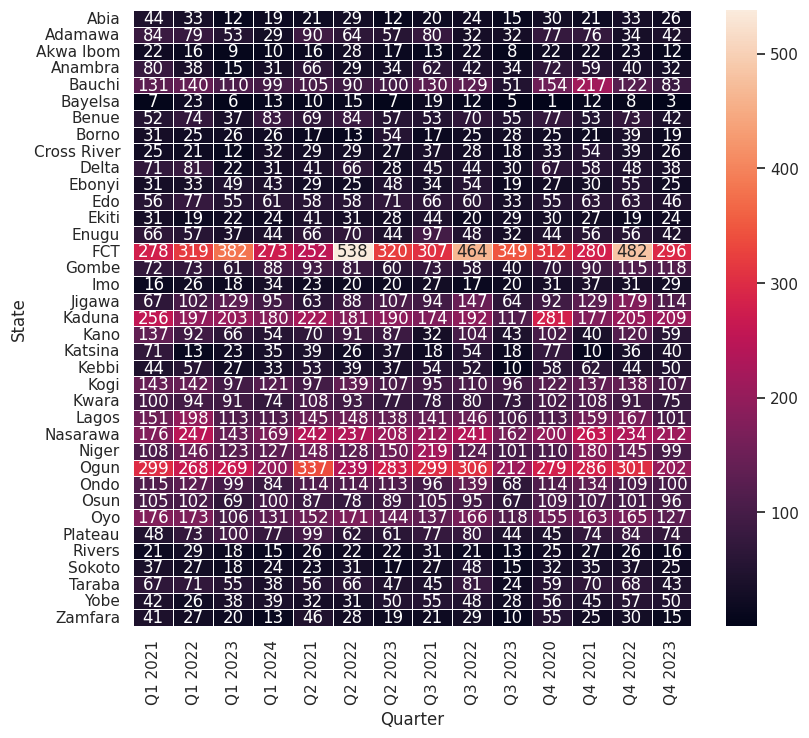

In [4]:
sns.set_theme()

# Let's make a heatmap for given data set by loading the dataset
crashes = (
    crash_df
    .pivot(index="State", columns="Quarter", values="Total_Crashes")
)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(crashes, annot=True, fmt="d", linewidths=.5, ax=ax)

* Here we are analyzing the reasons for accidents or each states
* In table there are different reasons of accident present as column with each entry as the number of vehicles involved in accidents
* We make a horizontal column bar for each state with number of vehicles involved and reason for crash is represented by different colours

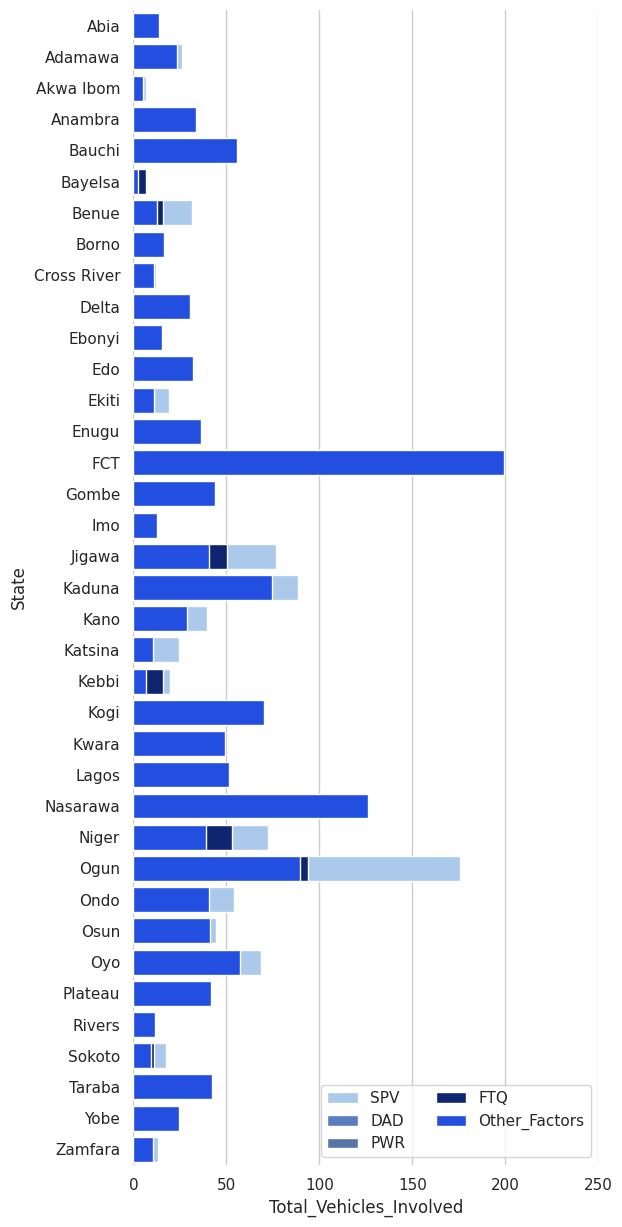

In [5]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("pastel")
sns.barplot(x="SPV",errorbar=None, y="State", data=crash_df,
            label="SPV", color="b")

sns.set_color_codes("muted")
sns.barplot(x="DAD", errorbar=None, y="State", data=crash_df,
            label="DAD", color="b")
sns.set_color_codes("deep")
sns.barplot(x="PWR",errorbar=None, y="State", data=crash_df,
            label="PWR", color="b")
sns.set_color_codes("dark")
sns.barplot(x="FTQ",errorbar=None, y="State", data=crash_df,
            label="FTQ", color="b")
sns.set_color_codes("bright")
sns.barplot(x="Other_Factors",errorbar=None, y="State", data=crash_df,
            label="Other_Factors", color="b")
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,250),
       xlabel="Total_Vehicles_Involved")
sns.despine(left=True, bottom=True)

Here we are making Number of Injured people versus Number Killed by plotting a scatterplot graph also joint histograms on both sides

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


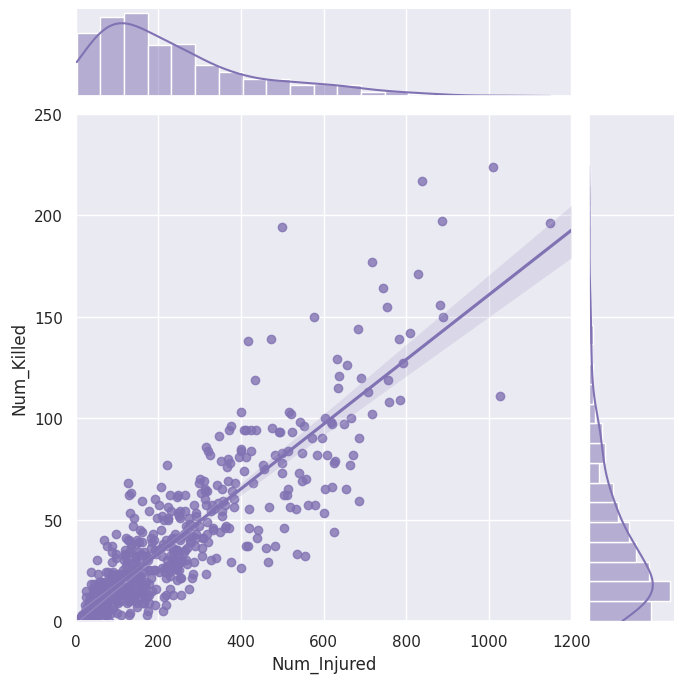

In [6]:
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="Num_Injured", y="Num_Killed", data=crash_df,
                  kind="reg", truncate=False,
                  xlim=(0, 1200), ylim=(0, 250),
                  color="m", height=7)

Here we make total vehicles involved versus total crashes scatterplot graph 

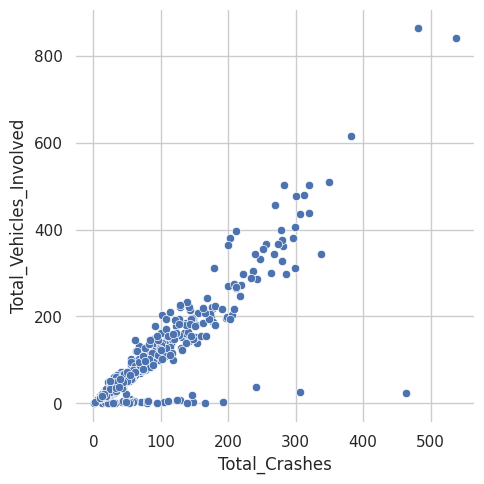

In [7]:
sns.set_theme(style="whitegrid")
g = sns.relplot(
    data=crash_df,
    x="Total_Crashes", y="Total_Vehicles_Involved")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

# Prediction
Here we are predicting number of people killed given the dataset using the XGB Regressor. 

In [8]:
encoder = LabelEncoder()

In [9]:
crash1_df=crash_df.copy()

In [10]:
crash1_df['Quarter'] = encoder.fit_transform(crash1_df['Quarter'])
crash1_df['State'] = encoder.fit_transform(crash1_df['State'])

In [11]:
crash1_df

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
0,10,0,30,146,31,37,19,0,0,0,18
1,10,1,77,234,36,94,57,0,0,0,37
2,10,2,22,28,7,24,15,0,0,1,8
3,10,3,72,152,20,83,43,1,0,0,39
4,10,4,154,685,90,140,74,0,0,0,66
...,...,...,...,...,...,...,...,...,...,...,...
513,3,32,15,32,4,21,17,0,0,0,4
514,3,33,24,122,41,52,41,0,0,0,11
515,3,34,38,98,17,38,17,0,0,0,21
516,3,35,39,234,13,55,38,0,0,0,17


In [12]:
X= crash1_df.drop(columns='Num_Killed',axis=1)
Y= crash1_df['Num_Killed']
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state= 2)

In [13]:
regressor = XGBRegressor()

In [14]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [15]:
training_data_pred = regressor.predict(X_train)

In [16]:
r2_train = metrics.r2_score(y_train,np.round(training_data_pred))
r2_train

0.9999861474240652

In [17]:
test_data_pred = regressor.predict(X_test)
r2_test = metrics.r2_score(y_test,np.round(test_data_pred))
r2_test

0.8153100377302855

In [18]:
np.round(test_data_pred)

array([ 13.,  19.,  40.,  16.,  27.,  98.,  22.,   8.,  44.,  76.,  49.,
        22.,   9.,  16.,  94.,  50.,  34.,  16., 196.,   6.,  34., 156.,
        27.,  27.,  25.,  19.,  62.,  12.,  15.,  24.,  44.,  11., 163.,
        13.,  13.,  12.,  83.,   9., 102.,   8.,  14., 154.,  51.,   2.,
        36.,  66.,   5.,  47.,  23.,  23.,  50.,  64.,  63.,  11., 111.,
        68.,  82.,  12.,  13.,  22.,  47.,  52.,  31.,   5.,   8.,  23.,
        34.,  22.,  24.,  32.,  30.,  64.,   5.,  39., 128.,  11.,  24.,
        22.,  16.,  10.,  27.,  25.,  42.,  69.,  30.,  19.,  29., 104.,
        32., 109.,  72., 104.,  19.,  99.,  17.,  32.,  11.,  20.,  72.,
        13.,  57.,  80.,  70.,  44.], dtype=float32)